In [60]:
import numpy as np
from PIL import Image
import sys

In [61]:
file = open("./texts/secret_text_file.txt", "r")
#secret_data = file.read()
#file.close()
#message = secret_data
message = 'This is a super secret message!'*10000

# Encode the message in a serie of 8-bit values
b_message = ''.join(["{:08b}".format(ord(x)) for x in message ])
b_message = [int(x) for x in b_message]

b_message_lenght = len(b_message)


# Get the image pixel arrays 
with Image.open("./images/Lenna.png") as img:
    width, height = img.size
    data = np.array(img)
    
# Flatten the pixel arrays
data = np.reshape(data, width*height*3)

# Overwrite pixel LSB
data[:b_message_lenght] = data[:b_message_lenght] & ~1 | b_message

# Reshape back to an image pixel array
data = np.reshape(data, (height, width, 3))

new_img = Image.fromarray(data)
new_img.save("./images/Lenna_lsb_encoded.png")

ValueError: operands could not be broadcast together with shapes (1555200,) (2480000,) 

In [ ]:
import cv2
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms
import torch.nn as nn

plt.rcParams['font.size'] = 14

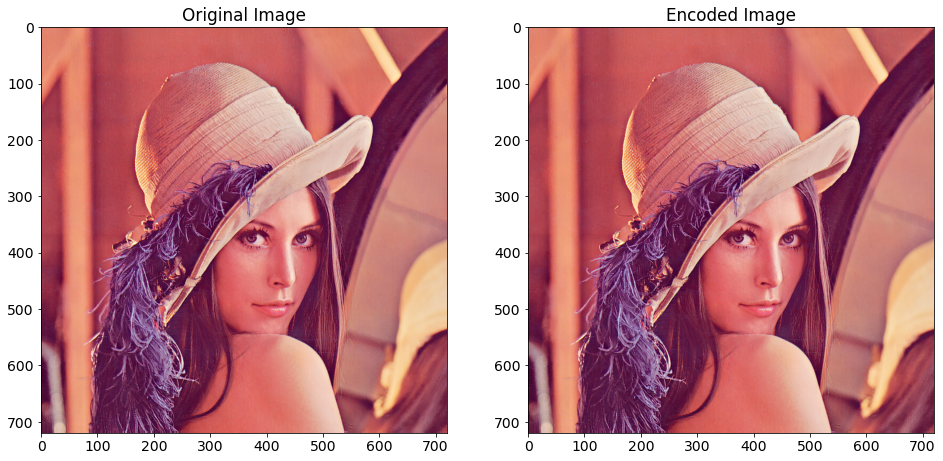

In [62]:
filename = './images/Lenna.png'
filename_encoded = './images/Lenna_lsb_encoded.png'
image1 = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(cv2.imread(filename_encoded), cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(image1)
ax[0].set_title("Original Image")
ax[1].imshow(image2)
ax[1].set_title("Encoded Image")
plt.show()